In [1]:
from  sklearn import datasets 
import pandas as pd 
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['price'] = boston.target

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
y = data.pop('price')


In [7]:
data_matrix = xgb.DMatrix(data,y)


In [10]:
xg_reg= xgb.XGBRegressor(
    objective='reg:linear',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=10,
    alpha=10
)
x_train,x_test,y_train  ,y_test = train_test_split(data,y,test_size=0.2)
xg_reg.fit(x_train,y_train)
pred = xg_reg.predict(x_test)
mean_squared_error(pred,y_test)

[17:14:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


77.26291883256194

In [23]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[17:24:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680256,0.025606,21.719121,0.019025
1,19.740499,0.072068,19.818880,0.061770
2,18.007202,0.119745,18.109862,0.129375
3,16.463925,0.115086,16.587236,0.182339
4,14.990313,0.112001,15.132977,0.166282


In [11]:
print(pred)

[11.497134  17.805876  16.714848  23.145098  10.769086  13.629955
 16.040535   9.185724  14.400352  15.106163  18.290731  15.078048
 12.814799  11.694844  10.7223    19.126724  13.839901   8.887201
  9.806446  14.0815735 11.29502   15.798067  15.083402  14.400352
 11.254292  17.06685   11.440978  13.602892  17.639324  16.459702
 14.846383  16.459702  21.57513   13.839901  10.903347  19.359621
 14.953808  15.620306  15.350357  13.839901  10.641816  15.669134
 14.397831   9.984885  15.80101   15.798067   8.445914  14.490938
 10.818837  10.055666  18.507471  19.733873  12.764967  15.822427
 13.697266  16.459702  11.773198  13.358564   8.445914  15.061985
  9.12421   16.459702  11.561062  23.407166   8.887201  19.583548
 15.669134   8.941358  15.294094  14.065869  21.317076  15.798067
 14.400352  12.278378  11.780902  14.400352   9.068844  15.669134
 13.913312  13.845604  14.312249  11.564856  14.284711  16.459702
 10.484387  15.217783  10.939103  13.839901  17.06685   19.468546
 12.8961  

In [22]:
print(y_test)
print(pred)

154    17.0
187    32.0
286    20.1
202    42.3
390    15.1
       ... 
457    13.5
153    19.4
79     20.3
378    13.1
24     15.6
Name: price, Length: 102, dtype: float64
[11.497134  17.805876  16.714848  23.145098  10.769086  13.629955
 16.040535   9.185724  14.400352  15.106163  18.290731  15.078048
 12.814799  11.694844  10.7223    19.126724  13.839901   8.887201
  9.806446  14.0815735 11.29502   15.798067  15.083402  14.400352
 11.254292  17.06685   11.440978  13.602892  17.639324  16.459702
 14.846383  16.459702  21.57513   13.839901  10.903347  19.359621
 14.953808  15.620306  15.350357  13.839901  10.641816  15.669134
 14.397831   9.984885  15.80101   15.798067   8.445914  14.490938
 10.818837  10.055666  18.507471  19.733873  12.764967  15.822427
 13.697266  16.459702  11.773198  13.358564   8.445914  15.061985
  9.12421   16.459702  11.561062  23.407166   8.887201  19.583548
 15.669134   8.941358  15.294094  14.065869  21.317076  15.798067
 14.400352  12.278378  11.780902  1

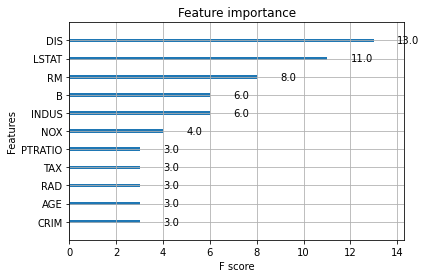

In [24]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()